In [242]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [243]:
%matplotlib inline
plt.rcParams.update({'font.size': 18})
sns.set_style('whitegrid')

In [244]:
IMG_DIR = 'report/img'
def save_pic(name):
    plt.tight_layout()
    plt.savefig(os.path.join(IMG_DIR, name))

In [245]:
df = pd.read_csv('data/declarations_raw.csv')
df.head()

,document_type,party,person_id,person_name,year,office_id,office_name,office_post,office_type_id,office_type_name,office_region_id,office_region_name,income_personal,income_relatives,savings,real_estate_amount,real_estate_squares
0,Предвыборная декларация,КПРФ,8,Зюганов Геннадий Андреевич,1998,14,Государственная Дума,Кандидат в депутаты государственной думы от из...,7,"Федеральный, без региональной структуры",NaN,NaN,124154.00,0.00,0.00,1,150.0
1,Предвыборная декларация,КПРФ,8,Зюганов Геннадий Андреевич,1999,449,Президент Российской Федерации,Кандидат на должность президента РФ,7,"Федеральный, без региональной структуры",NaN,NaN,495443.00,10804.00,0.00,3,252.7
2,Предвыборная декларация,КПРФ,8,Зюганов Геннадий Андреевич,2006,14,Государственная Дума,NaN,7,"Федеральный, без региональной структуры",NaN,NaN,1257784.00,0.00,141740.91,1,167.4
3,Предвыборная декларация,КПРФ,8,Зюганов Геннадий Андреевич,2006,449,Президент Российской Федерации,кандидат на пост Президента РФ,7,"Федеральный, без региональной структуры",NaN,NaN,3445291.61,145376.87,400490.32,2,281.3
4,Антикоррупционная декларация,КПРФ,8,Зюганов Геннадий Андреевич,2009,14,Государственная Дума,Член комитета Государственной Думы,7,"Федеральный, без региональной структуры",NaN,NaN,2075542.33,102279.19,0.00,3,448.7


In [246]:
df.shape

(90864, 17)

In [247]:
text_cols = ['document_type',
            'party',
            'person_name', 
             'office_name', 
           'office_post',
            'office_type_name',
           'office_region_name']

def only_alnum(text):
    if not text or not isinstance(text, str):
        return text
    words = text.split(' ')
    return ' '.join([''.join([c for c in word if c.isalnum()]) for word in words])

for col in text_cols:
    print(col)
    df[col] = df[col].str.lower().str.strip().apply(only_alnum)

document_type
party
person_name
office_name
office_post
office_type_name
office_region_name


# Exploration

In [248]:
print('Unique persons', df.person_id.unique().shape[0])
print('Unique offices', df.office_id.unique().shape[0])
print('Unique office regions', df.office_region_id.unique().shape[0])
print('Unique parties', df.party.unique().shape[0])

Unique persons 51909
Unique offices 2104
Unique office regions 86
Unique parties 22


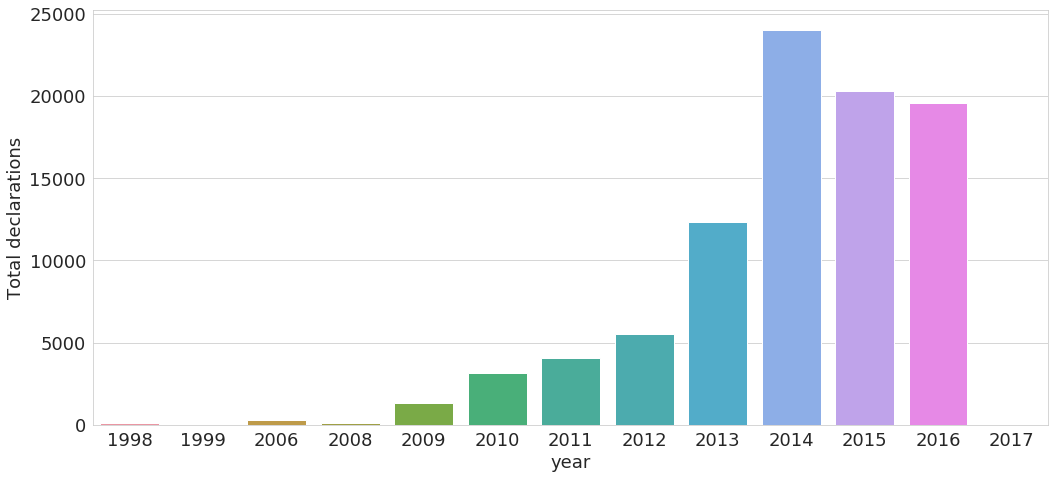

In [249]:
dec_count = df.groupby(['year'])['person_id'].count()
plt.figure(figsize=(15, 7))
sns.barplot(dec_count.index, dec_count)
plt.ylabel('Total declarations')
save_pic('total_dec')
plt.show()

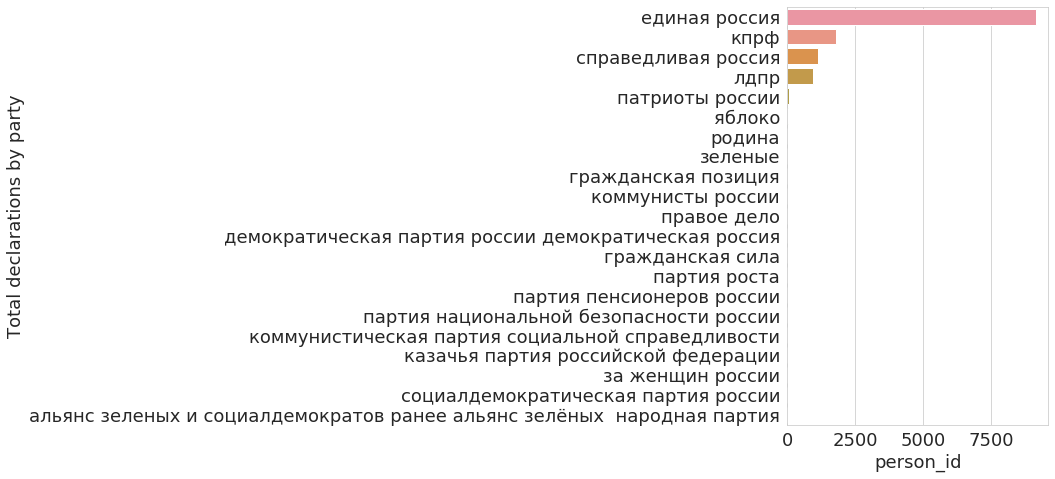

In [250]:
dec_count = df.groupby(['party'])['person_id'].count().sort_values(ascending=False)
plt.figure(figsize=(15, 7))
sns.barplot(y=dec_count.index, x=dec_count)
plt.ylabel('Total declarations by party')
save_pic('total_dec')
plt.show()

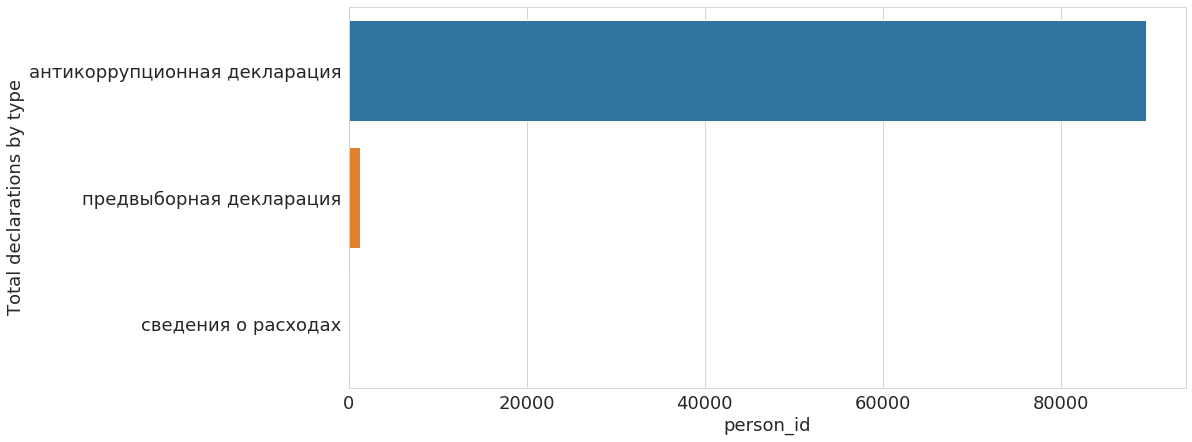

In [251]:
dec_count = df.groupby(['document_type'])['person_id'].count()
plt.figure(figsize=(15, 7))
sns.barplot(y=dec_count.index, x=dec_count)
plt.ylabel('Total declarations by type')
# save_pic('total_dec')
plt.show()

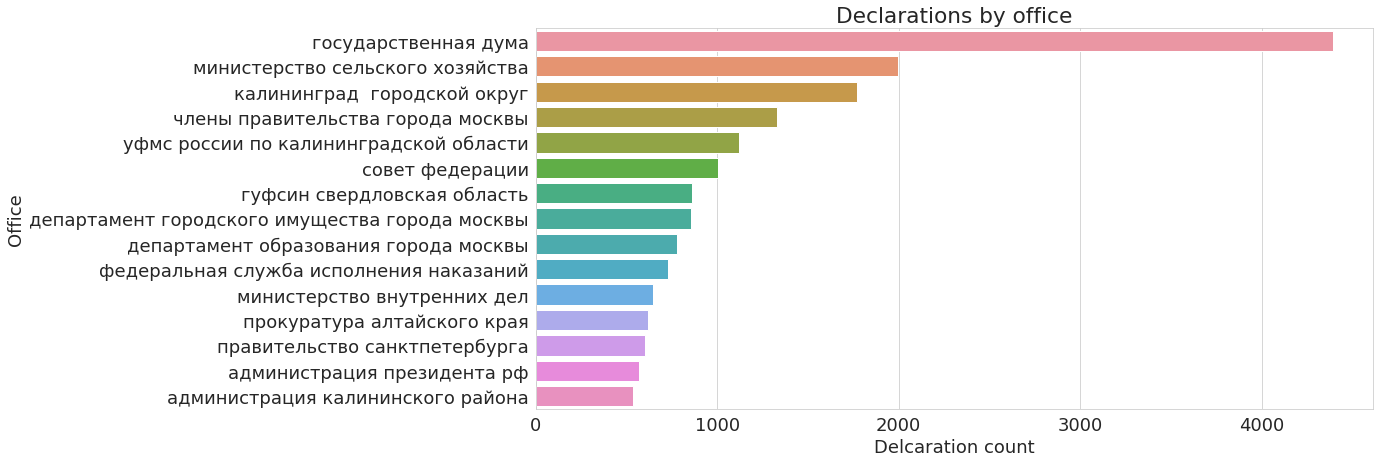

In [252]:
dec_count = df.groupby(['office_name'])['person_id'].count().sort_values(ascending=False).head(15)
plt.figure(figsize=(15, 7))
sns.barplot(dec_count, dec_count.index)
plt.ylabel('Office')
plt.xlabel('Delcaration count')
# save_pic('dec_by_office')
plt.title('Declarations by office')
plt.show()

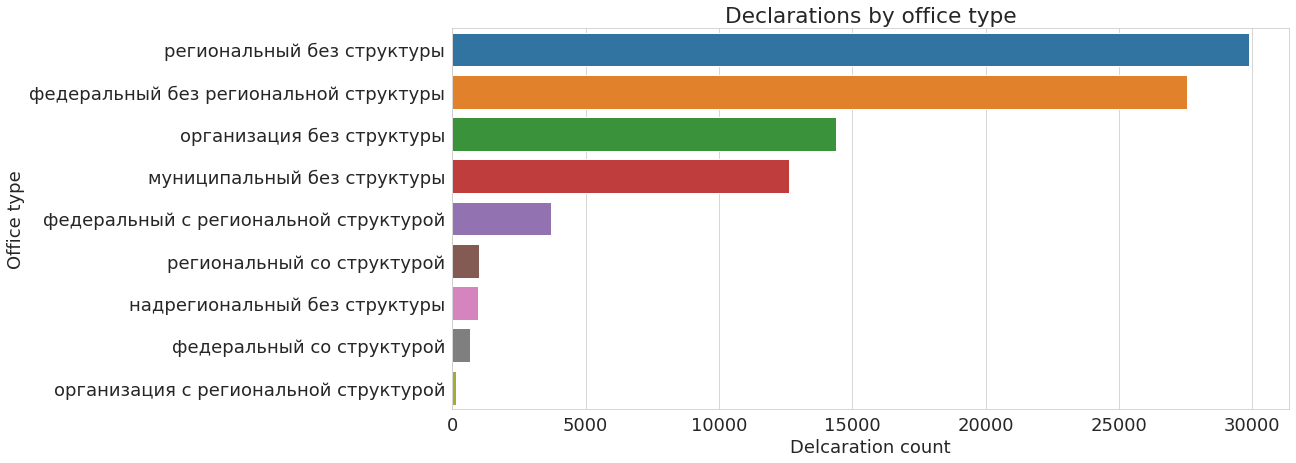

In [253]:
dec_count = df.groupby(['office_type_name'])['person_id'].count().sort_values(ascending=False)
plt.figure(figsize=(15, 7))
sns.barplot(dec_count, dec_count.index)
plt.ylabel('Office type')
plt.xlabel('Delcaration count')
# save_pic('dec_by_office_type')
plt.title('Declarations by office type')
plt.show()

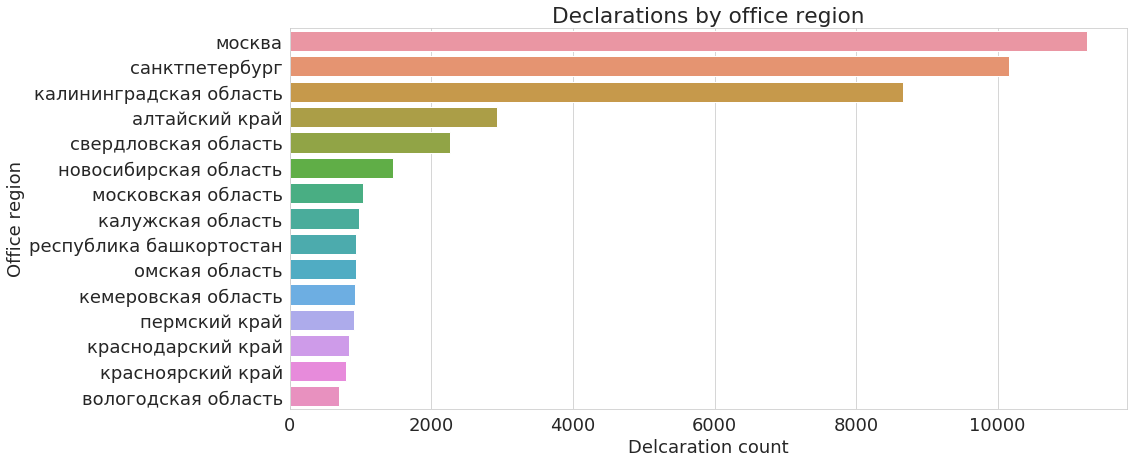

In [254]:
dec_count = df.groupby(['office_region_name'])['person_id'].count().sort_values(ascending=False).head(15)
plt.figure(figsize=(15, 7))
sns.barplot(dec_count, dec_count.index)
plt.ylabel('Office region')
plt.xlabel('Delcaration count')
# save_pic('dec_by_office_region')
plt.title('Declarations by office region')
plt.show()

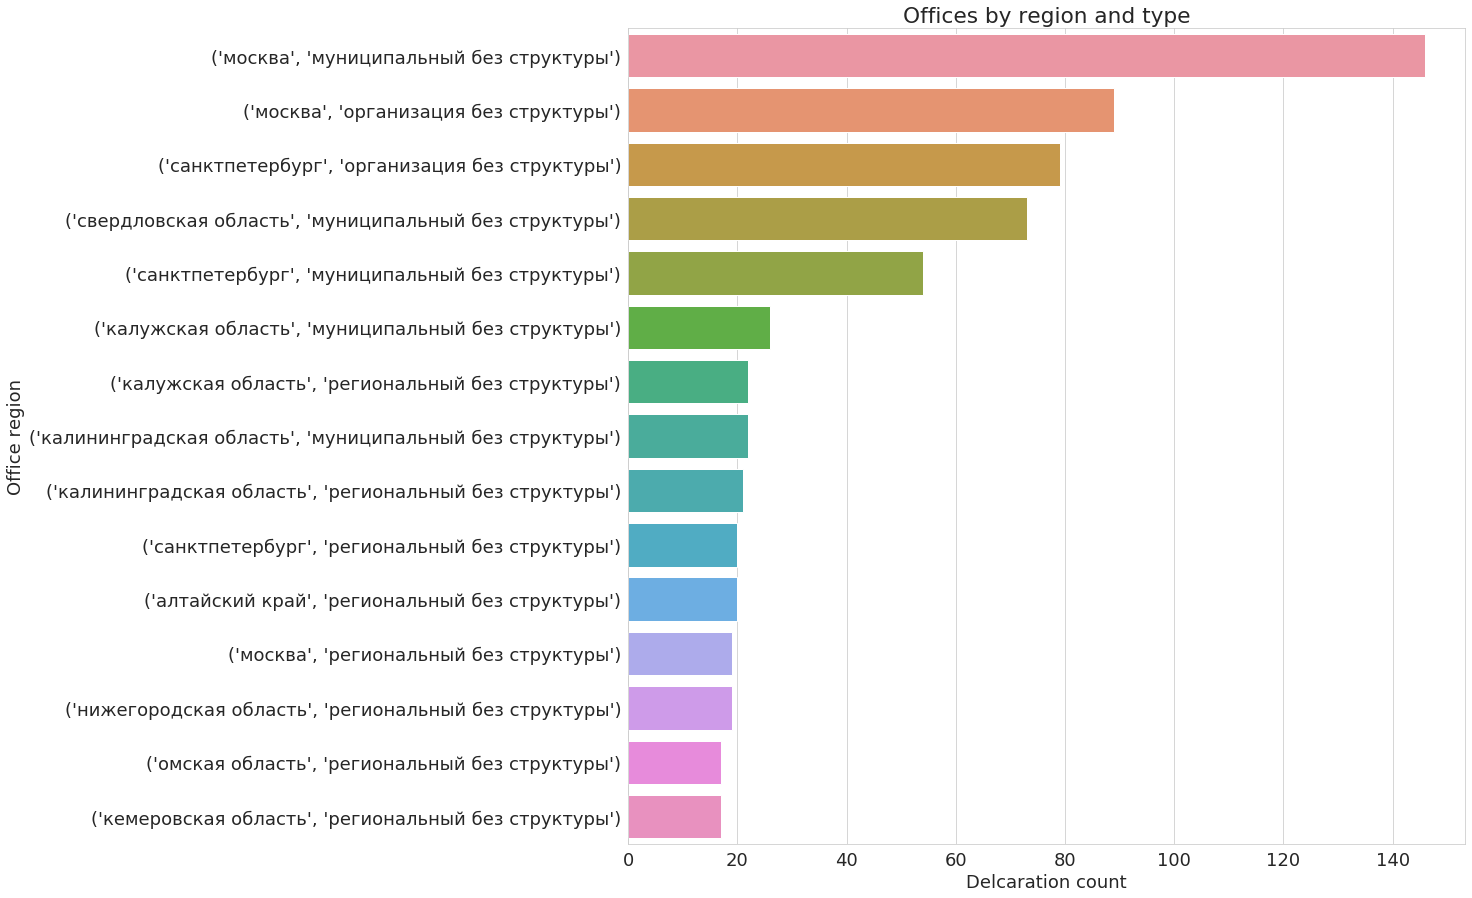

In [255]:
office_count = df.groupby([ 'office_region_name', 'office_type_name'])['office_id'].nunique().sort_values(ascending=False).head(15)
plt.figure(figsize=(15, 15))
sns.barplot(office_count, office_count.index)
plt.ylabel('Office region')
plt.xlabel('Delcaration count')
# save_pic('office_by_region_and_type')
plt.title('Offices by region and type')
plt.show()

/home/boris/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


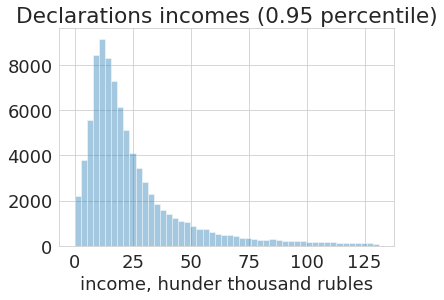

In [256]:
def no_outlier(s, q=0.9):
    return s[s < s.quantile(q)]


income = (df.income_personal + df.income_relatives) / 100000

plt.figure()
sns.distplot(no_outlier(income, 0.95), kde=False)
plt.xlabel('income, hunder thousand rubles')
plt.title('Declarations incomes (0.95 percentile)')
plt.show()

/home/boris/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


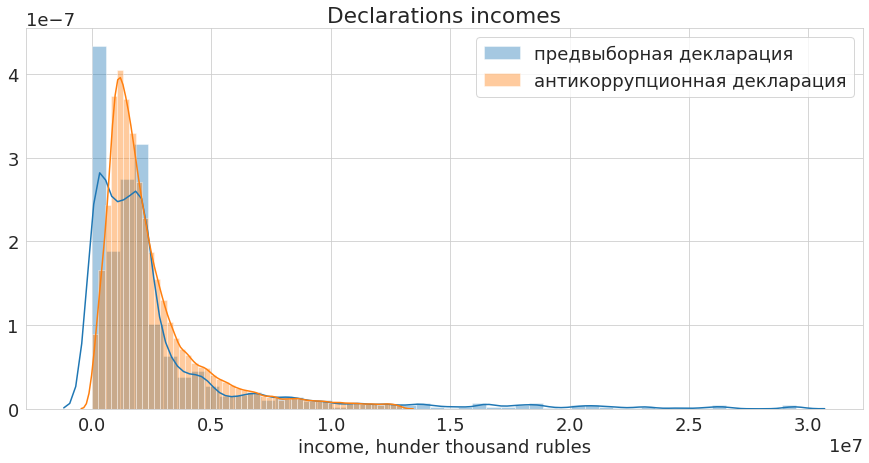

In [257]:
df_voting_dec = df[df.document_type == 'предвыборная декларация']
df_anticorrupt_dec = df[df.document_type == 'антикоррупционная декларация']

income_voting_dec = df_voting_dec.income_personal + df_voting_dec.income_relatives
income_anticorrupt_dec = df_anticorrupt_dec.income_personal + df_anticorrupt_dec.income_relatives

plt.figure(figsize=(15, 7))
sns.distplot(no_outlier(income_voting_dec, 0.95), kde=True, label='предвыборная декларация')
sns.distplot(no_outlier(income_anticorrupt_dec, 0.95), kde=True, label='антикоррупционная декларация')
plt.xlabel('income, hunder thousand rubles')
plt.title('Declarations incomes')
plt.legend()
plt.show()

In [258]:
df_voting_dec.sample(5).T

,24,2752,798,5348,2367
document_type,предвыборная декларация,предвыборная декларация,предвыборная декларация,предвыборная декларация,предвыборная декларация
party,кпрф,кпрф,лдпр,единая россия,справедливая россия
person_id,10,381,102,1021,317
person_name,андреев андрей анатольевич,бифов анатолий жамалович,свищев дмитрий александрович,тюльпанов вадим альбертович,курочкин антон анатольевич
year,2006,2010,2010,2010,2010
office_id,14,14,14,1,14
office_name,государственная дума,государственная дума,государственная дума,законодательное собрание санктпетербурга,государственная дума
office_post,NaN,NaN,NaN,председатель законодательного собрания санктпе...,NaN
office_type_id,7,7,7,18,7
office_type_name,федеральный без региональной структуры,федеральный без региональной структуры,федеральный без региональной структуры,региональный без структуры,федеральный без региональной структуры


In [259]:
df_anticorrupt_dec.sample(5).T

,72965,33667,1726,83462,18201
document_type,антикоррупционная декларация,антикоррупционная декларация,антикоррупционная декларация,антикоррупционная декларация,антикоррупционная декларация
party,NaN,кпрф,единая россия,NaN,NaN
person_id,37446,13859,219,45523,5639
person_name,осипов сергей николаевич,новиков владимир григорьевич,песковская юлия анатольевна,мельников сергей александрович,малеванная любовь васильевна
year,2014,2015,2010,2016,2014
office_id,3933,554,14,5965,1150
office_name,уфсин костромская область,законодательное собрание оренбургской области,государственная дума,департамент природопользования и охраны окружа...,администрация василеостровского района
office_post,заместитель начальника фку ик7,депутат законодательного собрания оренбургской...,член комитетa государственной думы,заместитель руководителя департамента природоп...,заместитель начальника отдела социальной защит...
office_type_id,24,18,7,21,21
office_type_name,федеральный со структурой,региональный без структуры,федеральный без региональной структуры,организация без структуры,организация без структуры


In [260]:
# Elective organs

df_voting_dec.office_name.value_counts()

государственная дума                                           1024
государственное  собрание  курултай республики башкортостан     163
президент российской федерации                                   29
народный хурал республики бурятия                                19
губернатор московской области                                    16
законодательное собрание санктпетербурга                         14
законодательное собрание владимирской области                    13
губернатор владимирской области                                   7
мэр города москвы                                                 6
губернатор магаданской области                                    4
губернатор чукотского автономного округа                          3
глава чувашской республики                                        1
губернатор иркутской области                                      1
губернатор еврейской автономной области                           1
губернатор костромской области                  

In [261]:
# Anticorrupt offices

df_anticorrupt_dec.office_name.value_counts()

государственная дума                                                         3369
министерство сельского хозяйства                                             1998
калининград  городской округ                                                 1772
члены правительства города москвы                                            1329
уфмс россии по калининградской области                                       1119
                                                                             ... 
фгбоу впо чеченский государственный педагогический университет                  1
арбитражный суд пермского края                                                  1
фгбоу впо удмуртский государственный университет                                1
гу ро фсс нижегородская область                                                 1
фгбоу впо карачаевочеркесский государственный университет имени уд алиева       1
Name: office_name, Length: 2104, dtype: int64

In [262]:
df_anticorrupt_dec[df.office_name == 'государственная дума'].office_post.value_counts()

/home/boris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


член комитетa государственной думы                                                                                                                                                                                                                        752
член комитета государственной думы                                                                                                                                                                                                                        470
заместитель председателя комитетa государственной думы                                                                                                                                                                                                    323
первый заместитель председателя комитетa государственной думы                                                                                                                                                                                 

# Office posts

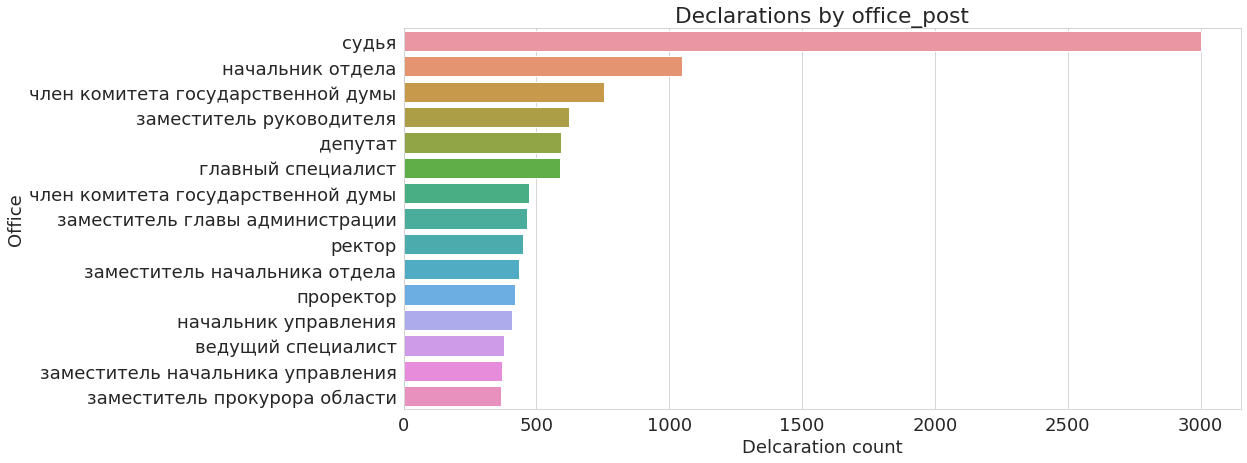

In [263]:
dec_count = df.groupby(['office_post'])['person_id'].count().sort_values(ascending=False).head(15)
plt.figure(figsize=(15, 7))
sns.barplot(dec_count, dec_count.index)
plt.ylabel('Office')
plt.xlabel('Delcaration count')
# save_pic('dec_by_office')
plt.title('Declarations by office_post')
plt.show()

In [264]:
'хуйccc23'.isalnum()#'/'.isalnum()

True

In [265]:
df.groupby(['office_post'])['person_id'].nunique().reset_index().head()

,office_post,person_id
0,директор фкп образовательное учреждение 160,1
1,170017,1
2,1й зам прокурора края,1
3,1й заместитель директора фгбу управление мелио...,1
4,1й заместитель прокурора области,1


# Clean data:

* Remove all elective declarations

In [266]:
df_clean = df[df.document_type == 'антикоррупционная декларация']
df_clean['income'] = df_clean.income_relatives + df_clean.income_personal
df_clean.shape

/home/boris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(89556, 18)

In [267]:
df_clean.head()

,document_type,party,person_id,person_name,year,office_id,office_name,office_post,office_type_id,office_type_name,office_region_id,office_region_name,income_personal,income_relatives,savings,real_estate_amount,real_estate_squares,income
4,антикоррупционная декларация,кпрф,8,зюганов геннадий андреевич,2009,14,государственная дума,член комитета государственной думы,7,федеральный без региональной структуры,NaN,NaN,2075542.33,102279.19,0.0,3,448.7,2177821.52
6,антикоррупционная декларация,кпрф,8,зюганов геннадий андреевич,2010,14,государственная дума,член комитетa государственной думы,7,федеральный без региональной структуры,NaN,NaN,2127686.49,168601.94,0.0,3,448.7,2296288.43
8,антикоррупционная декларация,кпрф,8,зюганов геннадий андреевич,2011,14,государственная дума,NaN,7,федеральный без региональной структуры,NaN,NaN,2177566.64,137656.24,0.0,3,448.7,2315222.88
9,антикоррупционная декларация,кпрф,8,зюганов геннадий андреевич,2012,14,государственная дума,член комитета гд по науке и наукоемким техноло...,7,федеральный без региональной структуры,NaN,NaN,2458749.04,194266.38,0.0,3,448.7,2653015.42
10,антикоррупционная декларация,кпрф,8,зюганов геннадий андреевич,2013,14,государственная дума,член комитета государственной думы,7,федеральный без региональной структуры,NaN,NaN,3194615.67,198267.22,0.0,3,448.7,3392882.89


* Remove big elective offices and special offices

In [268]:
df[df.office_name.str.contains('совет')].office_name.value_counts()

совет федерации                                  1002
советский  городской округ                        206
государственный совет республики татарстан        198
государственный совет удмуртской республики       174
государственный совет  хасэ республики адыгея     155
липецкий областной совет депутатов                113
верховный совет республики хакасия                100
орловский областной совет народных депутатов       99
совет народных депутатов кемеровской области       95
государственный совет чувашской республики         87
государственный совет республики коми              55
совет депутатов городского округа подольск         32
Name: office_name, dtype: int64

In [269]:
# big_dumas = [14, 113, 584]
# sovet_fed = [5]
# df_clean = df_clean[~df_clean.office_id.isin(big_dumas + sovet_fed)]
# df_clean.shape

* Remove small offices

In [270]:
office_dec_counts = df.office_id.value_counts()
print(office_dec_counts.shape)
big_enough_offices = office_dec_counts[office_dec_counts > office_dec_counts.quantile(0.75)]
big_enough_offices

(2104,)


14      4393
607     1998
1397    1772
979     1329
3898    1119
        ... 
4221      36
1132      36
1075      36
52        36
1072      36
Name: office_id, Length: 524, dtype: int64

In [271]:
df_clean = df_clean[df_clean.office_id.isin(big_enough_offices.index)]
df_clean.shape

(72821, 18)

* Remove all elective offices

In [272]:
# df_clean.document_type.value_counts()

In [273]:
# df_clean = df_clean[~df_clean.office_id.isin(df_voting_dec.office_id)]
# df_clean.shape

In [274]:
# df[df.office_name.str.contains('совет')].office_name.value_counts()

In [275]:
# dumas = np.array(df[df.office_name.str.contains('дума')].office_id.value_counts().index) # МГД, Мособлдума, клг дума, Госдума, Совет Федерации, итд
# df_clean = df_clean[~df_clean.office_id.isin(dumas)]
# df_clean.shape

In [276]:
# # Совет федерации
# df_clean = df_clean[~df_clean.office_id.isin([5])]
# df_clean.shape

In [277]:
# sobranie_office_ids = df[df.office_name.str.contains('собрание')].office_id
# df_clean = df_clean[~df_clean.office_id.isin(sobranie_office_ids)]
# df_clean.shape

In [278]:
# sovet_office_ids = df[df.office_name.str.contains('совет')].office_id
# df_clean = df_clean[~df_clean.office_id.isin(sovet_office_ids)]
# df_clean.shape

In [279]:
# df_clean.sample(5)

* Remove all declarations from years 1998 - 2009, 2017.

In [280]:
df_clean = df_clean[(df_clean.year >= 2009) & (df_clean.year <= 2016)]
df_clean.shape

(72764, 18)

* Remove all but 99 income percentile

In [281]:
person_incomes = df_clean.groupby(['person_id'])['income'].sum()
person_incomes.shape

(41551,)

In [282]:
person_incomes.quantile(0.99) / (2016 - 2009) # yearly income of 99 percentile

17608767.307142857

In [283]:
person_incomes[person_incomes < person_incomes.quantile(0.99)].shape

(41135,)

In [284]:
# valid_person_ids = np.array(person_incomes[person_incomes < person_incomes.quantile(0.99)].index)
# df_clean = df_clean[df_clean.person_id.isin(valid_person_ids)]
# df_clean.shape

* Remove all but top 10 regions

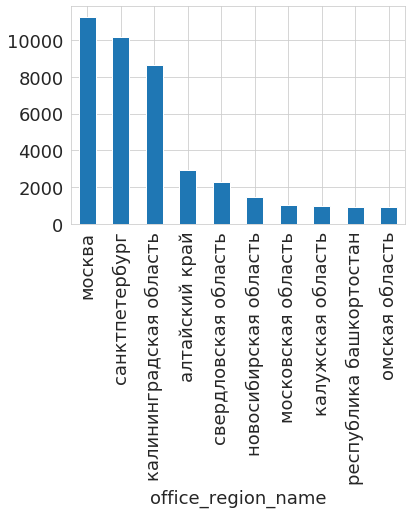

In [285]:
dec_count = df.groupby(['office_region_name'])['person_id'].count().sort_values(ascending=False)
dec_count.head(10).plot(kind='bar')

In [286]:
# region_names = np.array(dec_count.head(10).index)
# df_clean = df_clean[df_clean.office_region_name.isin(region_names)]
# df_clean.shape

* Remove all declarations of certain office tyoe type

In [287]:
df_clean.office_type_name.value_counts()

федеральный без региональной структуры    23924
региональный без структуры                22708
организация без структуры                 12600
муниципальный без структуры                7791
федеральный с региональной структурой      3535
региональный со структурой                  971
федеральный со структурой                   587
надрегиональный без структуры               506
организация c региональной структурой       142
Name: office_type_name, dtype: int64

In [288]:
# office_types = ('организация', 'федеральный')
# df_clean = df_clean[df_clean.office_type_name.str.contains(office_types[0])|df_clean.office_type_name.str.contains(office_types[1])]
# df_clean.shape

**Done preprocessing**

In [289]:
df_clean.head()

,document_type,party,person_id,person_name,year,office_id,office_name,office_post,office_type_id,office_type_name,office_region_id,office_region_name,income_personal,income_relatives,savings,real_estate_amount,real_estate_squares,income
4,антикоррупционная декларация,кпрф,8,зюганов геннадий андреевич,2009,14,государственная дума,член комитета государственной думы,7,федеральный без региональной структуры,NaN,NaN,2075542.33,102279.19,0.0,3,448.7,2177821.52
6,антикоррупционная декларация,кпрф,8,зюганов геннадий андреевич,2010,14,государственная дума,член комитетa государственной думы,7,федеральный без региональной структуры,NaN,NaN,2127686.49,168601.94,0.0,3,448.7,2296288.43
8,антикоррупционная декларация,кпрф,8,зюганов геннадий андреевич,2011,14,государственная дума,NaN,7,федеральный без региональной структуры,NaN,NaN,2177566.64,137656.24,0.0,3,448.7,2315222.88
9,антикоррупционная декларация,кпрф,8,зюганов геннадий андреевич,2012,14,государственная дума,член комитета гд по науке и наукоемким техноло...,7,федеральный без региональной структуры,NaN,NaN,2458749.04,194266.38,0.0,3,448.7,2653015.42
10,антикоррупционная декларация,кпрф,8,зюганов геннадий андреевич,2013,14,государственная дума,член комитета государственной думы,7,федеральный без региональной структуры,NaN,NaN,3194615.67,198267.22,0.0,3,448.7,3392882.89


In [290]:
df_clean.office_name.value_counts()

государственная дума                         3369
министерство сельского хозяйства             1998
калининград  городской округ                 1772
члены правительства города москвы            1329
уфмс россии по калининградской области       1119
                                             ... 
прокуратура омской области                     36
юао управа донского района                     36
комитет по науке и высшей школе                36
тинао администрация поселения вороновское      36
президент российской федерации                  8
Name: office_name, Length: 524, dtype: int64

In [291]:
df_clean.to_csv('data/declarations_clean.csv', index=False)

In [292]:
df_clean.shape

(72764, 18)